In [1]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

train_images = tf.reshape(train_images, (50000, 32, 32, 3))
test_images  = tf.reshape(test_images, (10000, 32, 32, 3))

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(64, (3, 3), 
                              activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

2022-01-21 18:57:15.515849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 18:57:15.519466: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 18:57:15.519736: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-21 18:57:15.520143: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 128)               2097280   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,100,362
Trainable params: 2,100,362
Non-trainable params: 0
______________________________________________

In [2]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_data = model.fit(train_images, train_labels, 
                         validation_data=(test_images, test_labels), 
                         batch_size=1024, epochs=200)

2022-01-21 18:57:17.040272: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1228800000 exceeds 10% of free system memory.


Epoch 1/200


2022-01-21 18:57:18.253038: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-01-21 18:57:19.333424: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


49/49 [==============================] - 3s 25ms/step - loss: 1.9439 - accuracy: 0.3053 - val_loss: 1.7378 - val_accuracy: 0.3787
Epoch 2/200
49/49 [==============================] - 1s 18ms/step - loss: 1.6327 - accuracy: 0.4324 - val_loss: 1.5556 - val_accuracy: 0.4623
Epoch 3/200
49/49 [==============================] - 1s 18ms/step - loss: 1.5072 - accuracy: 0.4791 - val_loss: 1.4762 - val_accuracy: 0.4947
Epoch 4/200
49/49 [==============================] - 1s 18ms/step - loss: 1.4286 - accuracy: 0.5051 - val_loss: 1.3996 - val_accuracy: 0.5162
Epoch 5/200
49/49 [==============================] - 1s 18ms/step - loss: 1.3704 - accuracy: 0.5246 - val_loss: 1.3582 - val_accuracy: 0.5286
Epoch 6/200
49/49 [==============================] - 1s 18ms/step - loss: 1.3187 - accuracy: 0.5451 - val_loss: 1.3167 - val_accuracy: 0.5404
Epoch 7/200
49/49 [==============================] - 1s 18ms/step - loss: 1.2765 - accuracy: 0.5585 - val_loss: 1.2933 - val_accuracy: 0.5481
Epoch 8/200
49/49 

49/49 [==============================] - 1s 18ms/step - loss: 0.3539 - accuracy: 0.8955 - val_loss: 1.0959 - val_accuracy: 0.6687
Epoch 116/200
49/49 [==============================] - 1s 18ms/step - loss: 0.3490 - accuracy: 0.8986 - val_loss: 1.1220 - val_accuracy: 0.6629
Epoch 117/200
49/49 [==============================] - 1s 18ms/step - loss: 0.3424 - accuracy: 0.9028 - val_loss: 1.1001 - val_accuracy: 0.6685
Epoch 118/200
49/49 [==============================] - 1s 18ms/step - loss: 0.3418 - accuracy: 0.9010 - val_loss: 1.1155 - val_accuracy: 0.6665
Epoch 119/200
49/49 [==============================] - 1s 18ms/step - loss: 0.3354 - accuracy: 0.9044 - val_loss: 1.1242 - val_accuracy: 0.6628
Epoch 120/200
49/49 [==============================] - 1s 18ms/step - loss: 0.3351 - accuracy: 0.9036 - val_loss: 1.1520 - val_accuracy: 0.6589
Epoch 121/200
49/49 [==============================] - 1s 18ms/step - loss: 0.3393 - accuracy: 0.9000 - val_loss: 1.1289 - val_accuracy: 0.6622
Epoch 

Epoch 172/200
49/49 [==============================] - 1s 18ms/step - loss: 0.1571 - accuracy: 0.9703 - val_loss: 1.4011 - val_accuracy: 0.6501
Epoch 173/200
49/49 [==============================] - 1s 18ms/step - loss: 0.1581 - accuracy: 0.9691 - val_loss: 1.3872 - val_accuracy: 0.6537
Epoch 174/200
49/49 [==============================] - 1s 18ms/step - loss: 0.1543 - accuracy: 0.9706 - val_loss: 1.3918 - val_accuracy: 0.6508
Epoch 175/200
49/49 [==============================] - 1s 18ms/step - loss: 0.1523 - accuracy: 0.9706 - val_loss: 1.4189 - val_accuracy: 0.6519
Epoch 176/200
49/49 [==============================] - 1s 18ms/step - loss: 0.1532 - accuracy: 0.9703 - val_loss: 1.4269 - val_accuracy: 0.6458
Epoch 177/200
49/49 [==============================] - 1s 18ms/step - loss: 0.1486 - accuracy: 0.9719 - val_loss: 1.4012 - val_accuracy: 0.6519
Epoch 178/200
49/49 [==============================] - 1s 18ms/step - loss: 0.1448 - accuracy: 0.9732 - val_loss: 1.4202 - val_accuracy:

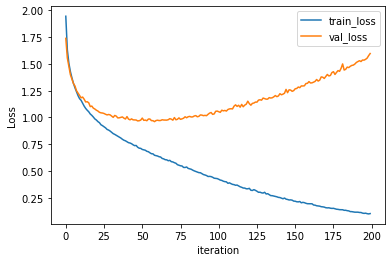

In [3]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.plot(history_data.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

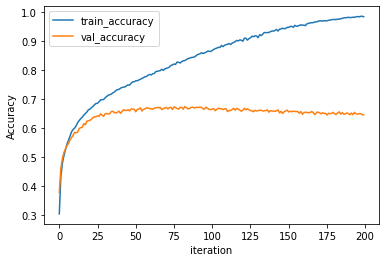

In [4]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.plot(history_data.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [5]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

train_images = tf.reshape(train_images, (50000, 32, 32, 3))
test_images  = tf.reshape(test_images, (10000, 32, 32, 3))

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(256, (3, 3), 
                              activation='relu', 
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

2022-01-21 19:00:19.265321: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1228800000 exceeds 10% of free system memory.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       7168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 256)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8388736   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 8,397,194
Trainable params: 8,397,194
Non-trainable params: 0
____________________________________________

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_data = model.fit(train_images, train_labels, 
                         validation_data=(test_images, test_labels), 
                         batch_size=1024, epochs=200)

2022-01-21 19:00:20.058910: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1228800000 exceeds 10% of free system memory.


Epoch 1/200
 3/49 [>.............................] - ETA: 1s - loss: 2.4052 - accuracy: 0.1162 

2022-01-21 19:00:20.865617: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-21 19:00:20.865670: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-21 19:00:20.865707: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-21 19:00:20.865739: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Alloc

49/49 [==============================] - 3s 57ms/step - loss: 1.8550 - accuracy: 0.3397 - val_loss: 1.5562 - val_accuracy: 0.4492
Epoch 2/200
49/49 [==============================] - 2s 48ms/step - loss: 1.4463 - accuracy: 0.4965 - val_loss: 1.3560 - val_accuracy: 0.5262
Epoch 3/200
49/49 [==============================] - 2s 47ms/step - loss: 1.3005 - accuracy: 0.5507 - val_loss: 1.2786 - val_accuracy: 0.5574
Epoch 4/200
49/49 [==============================] - 2s 47ms/step - loss: 1.2230 - accuracy: 0.5773 - val_loss: 1.2197 - val_accuracy: 0.5710
Epoch 5/200
49/49 [==============================] - 2s 47ms/step - loss: 1.1531 - accuracy: 0.6047 - val_loss: 1.1792 - val_accuracy: 0.5886
Epoch 6/200
49/49 [==============================] - 2s 47ms/step - loss: 1.1093 - accuracy: 0.6199 - val_loss: 1.1412 - val_accuracy: 0.6015
Epoch 7/200
49/49 [==============================] - 2s 48ms/step - loss: 1.0758 - accuracy: 0.6304 - val_loss: 1.1317 - val_accuracy: 0.6082
Epoch 8/200
49/49 

49/49 [==============================] - 2s 48ms/step - loss: 0.0419 - accuracy: 0.9980 - val_loss: 1.5427 - val_accuracy: 0.6628
Epoch 116/200
49/49 [==============================] - 2s 48ms/step - loss: 0.0401 - accuracy: 0.9983 - val_loss: 1.5294 - val_accuracy: 0.6694
Epoch 117/200
49/49 [==============================] - 2s 47ms/step - loss: 0.0370 - accuracy: 0.9987 - val_loss: 1.5350 - val_accuracy: 0.6686
Epoch 118/200
49/49 [==============================] - 2s 47ms/step - loss: 0.0397 - accuracy: 0.9978 - val_loss: 1.5426 - val_accuracy: 0.6691
Epoch 119/200
49/49 [==============================] - 2s 48ms/step - loss: 0.0339 - accuracy: 0.9989 - val_loss: 1.5524 - val_accuracy: 0.6694
Epoch 120/200
49/49 [==============================] - 2s 47ms/step - loss: 0.0351 - accuracy: 0.9986 - val_loss: 1.5581 - val_accuracy: 0.6694
Epoch 121/200
49/49 [==============================] - 2s 48ms/step - loss: 0.0328 - accuracy: 0.9988 - val_loss: 1.5989 - val_accuracy: 0.6661
Epoch 

Epoch 172/200
49/49 [==============================] - 2s 47ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 1.8233 - val_accuracy: 0.6678
Epoch 173/200
49/49 [==============================] - 2s 48ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 1.8422 - val_accuracy: 0.6704
Epoch 174/200
49/49 [==============================] - 2s 47ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 1.8439 - val_accuracy: 0.6684
Epoch 175/200
49/49 [==============================] - 2s 47ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.8521 - val_accuracy: 0.6661
Epoch 176/200
49/49 [==============================] - 2s 48ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 1.8588 - val_accuracy: 0.6671
Epoch 177/200
49/49 [==============================] - 2s 47ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.8723 - val_accuracy: 0.6682
Epoch 178/200
49/49 [==============================] - 2s 48ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 1.8809 - val_accuracy:

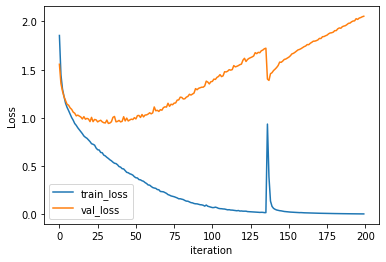

In [7]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.plot(history_data.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

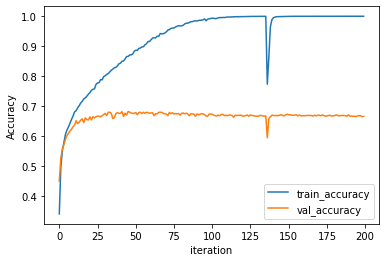

In [8]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.plot(history_data.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()